# Especialização em Ciência de Dados - PUC-Rio
# Trabalho de Machine Learning
## Análise Exploratória de Dados

In [209]:
# Importações de pacotes necessários
import sklearn as sl
import warnings
warnings.filterwarnings("ignore")
# Outros
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#sl.__version__

## Definição do Problema

Conjunto de dados: informações demográficas e profissionais para aproximadamente 49 mil cidadãos, referentes 1994 e oriundas da United States Census Bureau. Traz, ainda, classificação binária para cada um dos indivíduos, informando se a renda anual recebida naquele ano superou, ou não, US$50 mil. Fonte: Kaggle.

Objetivo do trabalho: Desenvolver um modelo de Machine Learning, de classificação binária, que preveja com maior precisão possível o nível de renda de cada indivíduo, a partir de seus atributos socioeconômicos. Em um contexto não acadêmico, esse tipo de modelo poderia auxiliar, por exemplo, instituições financeiras buscando estimar a capacidade de pagamento de um cliente.

Os dados contêm informações anônimas, como idade, ocupação, educação, classe trabalhadora, etc. O objetivo é treinar um classificador binário para prever a renda que tem dois valores possíveis:> 50K e <=50K. Existem 48686 instâncias e 14 atributos no conjunto de dados. Os dados contêm uma boa combinação de valores categóricos, numéricos e ausentes (missing).

Para mais detalhes sobre este dataset, consulte: http://archive.ics.uci.edu/

### Informações sobre os atributos:

1. age               idade
2. workClass         tipo de trabalho
3. fnlwgt            sampling weight 
4. education         tipo de educacao
5. education-num     tipo de educacao numerico 
6. marital-status    situacao marital 
7. occupation        nome da ocupacao 
8. relationship      relacionamento familiar 
9. race              raça 
10. sex              sexo 
11. capital-gain      income from investment sources, apart from wages/salary
12. capital-loss      losses from investment sources, apart from wages/salary
13. hours-per-week    horas trabalhadas por semana 
14. native-country    país de origem 
15. CLASS (income)    valor do ganho (<=50k ou > 50k)

## Carga do dataset

In [ ]:
# Observação sobre importação de pacotes

# FORMA 1: Apenas a função que queremos usar (ex: read_csv)
# Importa apenas a função read_csv
# from pandas import read_csv

# FORMA 2: Todo o pacote
# import pandas as pd

Iremos usar o pacote Pandas ( Python Data Analysis Library) para carregar de um arquivo .csv sem cabeçalho. Use **APENAS UM** dos dois blocos a seguir:

In [214]:
# Carrega arquivo csv usando Pandas (NÃO FUNCIONA NO GOOGLE COLAB)

# Importa  todo o pacote Pandas
import pandas as pd

# Informa o caminho do arquivo
arquivo = 'data/salario.csv'

# Informa o cabeçalho das colunas
colunas = ['age', 'workclass', 'fnlwgt', 'education', 'grau', 'est-civil', 'ocupacao', 'relacao',
           'raça', 'sexo', 'capital-gain', 'capital-loss', 'horasemana', 'pais','class']

# Lê o arquivo utilizando as colunas informadas
df = pd.read_csv(arquivo, names = colunas)

In [184]:
# Carrega arquivo csv usando Pandas usando uma URL

# Importa  todo o pacote Pandas
import pandas as pd

# Informa a URL de importação do dataset
url = "https://github.com/ducks2002/Previsao_salarios/blob/master/salario.csv"

# Informa o cabeçalho das colunas
colunas = ['age', 'workclass', 'fnlwgt', 'education', 'grau', 'est-civil', 'ocupacao', 'relacao',
           'raça', 'sexo', 'capital-gain', 'capital-loss', 'horasemana', 'pais','class']


# Lê o arquivo utilizando as colunas informadas
df = pd.read_csv(url, names=colunas, skiprows=0, delimiter=',')

##Funçoes criadas para o problema

In [162]:
# As strings do dataset estao com espaço na frente e apos cada string, ex: ' Private'. Para facilitar essa funçao remove todos
# os espaços antes e depois das strings. após executar: 'Private'
# Ref https://stackoverflow.com/questions/40950310/strip-trim-all-strings-of-a-dataframe

def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

# simple example of trimming whitespace from data elements
#df = pd.DataFrame([['     a  ',      10], ['  c           ', 5]])
#Como fazer a chamada da funçao: df = trim_all_columns(df)

In [171]:
# VErificamos que as informacoes faltantes do aqruivo vieram com ?. 
#Substituir tudo que possui "?" por NaN do pacote pandas
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table


#Uma das tarefas na qual o pandas é reconhecidamente poderoso é a habilidade de tratar dados incompletos.
#Por muitos motivos pode haver incompletude no dataset, o `np.nan` é um valor especial definido no Numpy, sigla para 
# Not a Number, o pandas preenche células sem valores em um DataFrame lido com `np.nan`.

Your selected dataframe has 15 columns and 48687 Rows.
There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
ocupacao,0,2799,5.7,2799,5.7,object
workclass,0,2789,5.7,2789,5.7,object
pais,0,851,1.7,851,1.7,object
age,0,1,0.0,1,0.0,float64


## Análise Exploratória

In [216]:
# Chamada para a funçao que limpa os espaços das strings:
df = trim_all_columns(df)

In [217]:
# Substituir tudo que possui "?" por NaN (do pacote pandas)

df=df.replace({"?": np.nan})

In [202]:
# Substituir tudo que possui "Null" por NaN (do pacote pandas)



### Informações Gerais e Estatísticas Descritivas

In [218]:
# Mostra as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48686 entries, 0 to 48685
Data columns (total 15 columns):
age             48686 non-null int64
workclass       45897 non-null object
fnlwgt          48686 non-null int64
education       48686 non-null object
grau            48686 non-null int64
est-civil       48686 non-null object
ocupacao        45887 non-null object
relacao         48686 non-null object
raça            48686 non-null object
sexo            48686 non-null object
capital-gain    48686 non-null int64
capital-loss    48686 non-null int64
horasemana      48686 non-null int64
pais            47835 non-null object
class           48686 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [219]:
# Mostra as 5 primeiras linhas do dataset
df.head(5)

,age,workclass,fnlwgt,education,grau,est-civil,ocupacao,relacao,raça,sexo,capital-gain,capital-loss,horasemana,pais,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [220]:
# Mostra as 5 últimas linhas do dataset
df.tail(5)

,age,workclass,fnlwgt,education,grau,est-civil,ocupacao,relacao,raça,sexo,capital-gain,capital-loss,horasemana,pais,class
48681,53,Local-gov,186303,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1887,40,United-States,>50K
48682,52,Local-gov,143533,7th-8th,4,Never-married,Other-service,Other-relative,Black,Female,0,0,40,United-States,<=50K
48683,42,Private,288154,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,89,United-States,>50K
48684,48,Private,325372,1st-4th,2,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Portugal,<=50K
48685,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [252]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'grau', 'est-civil', 'ocupacao', 'raça',
       'sexo', 'capital-gain', 'capital-loss', 'horasemana', 'pais', 'class'],
      dtype='object')

In [249]:
# A coluna Education (object) corresponde a Grau, que ja esta codificada.
#A colunas Relacao corresponde a Estado civil.
#Nossa primeira ação então será a exclusão destas informações do nosso dataset:

df.drop(['education','relacao'], axis=1, inplace=True)

KeyError: "labels ['education'] not contained in axis"

In [254]:
df.head(5)

,age,workclass,fnlwgt,grau,est-civil,ocupacao,raça,sexo,capital-gain,capital-loss,horasemana,pais,class
0,25,Private,226802,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,10,Never-married,NaN,White,Female,0,0,30,United-States,<=50K


In [256]:
# Mostra as dimensões do dataset
df.shape

(48686, 13)

É sempre importante verificar o tipo do atributos do dataset, pois pode ser necessário realizar conversões.

In [278]:
# Verifica o tipo de dataset de cada atributo
df.dtypes

age              int64
workclass       object
grau             int64
est-civil       object
ocupacao        object
raça            object
sexo            object
capital-gain     int64
capital-loss     int64
horasemana       int64
pais            object
class           object
dtype: object

In [258]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
df.describe()

,age,fnlwgt,grau,capital-gain,capital-loss,horasemana
count,48686.000000,4.868600e+04,48686.000000,48686.000000,48686.000000,48686.000000
mean,38.638828,1.896783e+05,10.078318,1079.118227,87.578996,40.418827
std,13.708014,1.056328e+05,2.569692,7449.315182,403.225281,12.386420
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376498e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [283]:
# Mostra as Colunas que possuem N campos nulos (missing)
count_nan = len(df) - df.count()
count_nan

age                0
workclass       2789
grau               0
est-civil          0
ocupacao        2799
raça               0
sexo               0
capital-gain       0
capital-loss       0
horasemana         0
pais             851
class              0
dtype: int64

In [260]:
# Chama a funçao que mostra o Percentual de Missings por columas 
miss=missing_zero_values_table(df)
miss

Your selected dataframe has 13 columns and 48686 Rows.
There are 3 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
ocupacao,0,2799,5.7,2799,5.7,object
workclass,0,2789,5.7,2789,5.7,object
pais,0,851,1.7,851,1.7,object


In [285]:
# Como os dados faltantes sao do tipo objeto, nao temos como preencher esses valores com funçao estatistica. Portanto vamos remove-los:
# O pandas simplifica a remoção de quaiquer linhas ou colunas que possuem um np.nan, 
#por padrão o .dropna() retorna as linhas que não contém um NaN:

df=df.dropna()
# Chama a funçao que mostra o Percentual de Missings por columas 
miss=missing_zero_values_table(df)
miss

Your selected dataframe has 12 columns and 45081 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [286]:
# verificando a hegemoneidade da nossa amostra em relação a workclass
df["workclass"].value_counts()

Private             33192
Self-emp-not-inc     3786
Local-gov            3093
State-gov            1943
Self-emp-inc         1643
Federal-gov          1403
Without-pay            21
Name: workclass, dtype: int64

In [287]:
# verificando a hegemoneidade da nossa amostra em relação aos Paises
df["pais"].value_counts()

United-States                 41160
Mexico                          900
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               96
Japan                            88
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           80
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           54
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [288]:
# verificando a hegemoneidade da nossa amostra em relação aos Peso
df["fnlwgt"].value_counts()

KeyError: 'fnlwgt'

In [263]:
# O PEso é um atributo muito particular. não sendo úteis para modelos que têm como objetivo a generalização. 
#Portanto também será removida

df.drop(['fnlwgt'], axis=1, inplace=True)


Vamos agora verificar se o dataset tem as classes balanceadas para que possamos tratar o desbalanceamento posteriormente, se necessário. Veremos que as classes 0 (não ocorrência de diabetes) e 1 (ocorrência de diabetes) estão desbalanceadas.

In [289]:
# Verifica a distribuição das classes
df.groupby('class').size()

class
<=50K    33903
>50K     11178
dtype: int64

Lembrando a aula teórica: a covariância representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:
* Próximo de -1 : há uma correlação negativa entre as variáveis, 
* Próximo de +1: há uma correlação positiva entre as variáveis. 
* 0: não há correlação entre as variáveis.

<i>OBS: Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documentação do algoritmo para verificar se algum tipo de tratamento de dataset é necessário.</i>

In [290]:
# Correlação de Pearson
df.corr(method = 'pearson')
# Outros métodos de correlação: {‘pearson’, ‘kendall’, ‘spearman’}

,age,grau,capital-gain,capital-loss,horasemana
age,1.000000,0.037919,0.079504,0.059482,0.102343
grau,0.037919,1.000000,0.127436,0.081872,0.146718
capital-gain,0.079504,0.127436,1.000000,-0.032119,0.084184
capital-loss,0.059482,0.081872,-0.032119,1.000000,0.054223
horasemana,0.102343,0.146718,0.084184,0.054223,1.000000


Vamos agora verificar a simetria (skew) da distribuição de dataset de cada atributo, assumindo que a distribuição é normal (gaussiana). Se o coeficiente for:
* Maior que 0: a distribuição é assimétrica positiva (maior à esquerda e menor à direita).
* Menor que 0: a distribuição é assimétrica negativa (maior à direita e menor à esquerda).
* Igual a 0: a distribuição é simétrica.

<i>OBS: Muitos algoritmos de Machine Learning consideram que os dataset possuem uma distribuição normal. Conhecer a simetria dos dataset é importante para que seja realizado algum tratamento, se necessário.</i>

In [291]:
# Simetria de cada atributo
df.skew()

age              0.532386
grau            -0.310473
capital-gain    11.793329
capital-loss     4.515201
horasemana       0.341619
dtype: float64

In [309]:
df.head(5)

,age,workclass,grau,est-civil,ocupacao,raça,sexo,capital-gain,capital-loss,horasemana,pais,class
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
5,34,Private,6,Never-married,Other-service,White,Male,0,0,30,United-States,<=50K


In [318]:
# Ajustar a classe para classificacao Binaria. onde: 0 <=50k   e   1 >50k
#df2 = df.replace({"<=50K": 0})
df=df.replace({"<=50K":0,">50K":1})
df.head()

,age,workclass,grau,est-civil,ocupacao,raça,sexo,capital-gain,capital-loss,horasemana,pais,class
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,1
5,34,Private,6,Never-married,Other-service,White,Male,0,0,30,United-States,0


### Visualização com Matplotlib

In [292]:
# Importa o pacote matplotlib
import matplotlib.pyplot as plt
# Indica que os dataset serão gerados nesta mesma janela
%matplotlib inline

Ao exibirmos o histograma do dataset, veremos que os atributos **age**, **fnlwgt** e **test** possuem uma distribuição exponencial, e que as colunas **horasemana** e **grau** possuem uma distribuição aproximadamente normal.

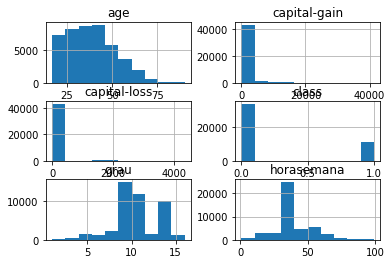

In [319]:
# Histograma
df.hist()
plt.show()

O Gráfico de Densidade, ou Density Plot, é bem parecido com o histograma, mas com uma visualização um pouco diferente.  Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset.

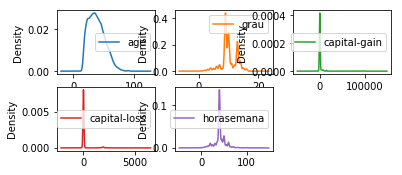

In [294]:
# Density Plot
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

No boxblot, a linha no centro (vermelho) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

*OBS: Se os dataset são muito distantes da média (acima de 3 desvios padrão da média), podem ser outliers.*

No dataset, veremos que a dispersão dos atributos é bem diferente.

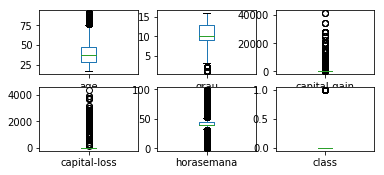

In [320]:
# Boxplot
df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False)
plt.show()

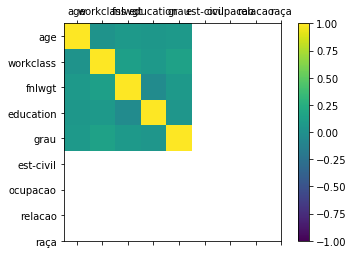

In [271]:
# Matriz de Correlação (com labels)

# Armazena as correlações em uma variável
correlations = df.corr()

# Plot
import numpy as np
# Cria uma figura
fig = plt.figure()
# Adiciona o gráfico
ax = fig.add_subplot(111)
# Mostra as correlações
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
# Colore o boxplot
fig.colorbar(cax)
# Define o tamanho do quadrado
ticks = np.arange(0, 9, 1)
# Seta as labels dos eixos x e y
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
# Mostra o gráfico
plt.show()

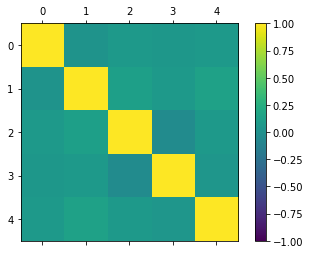

In [272]:
# Matriz de Correlação (sem labels)

# Armazena as correlações em uma variável
correlations = df.corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

O gráfico de dispersão (scatter plot) mostra o relacionamento entre duas variáveis.

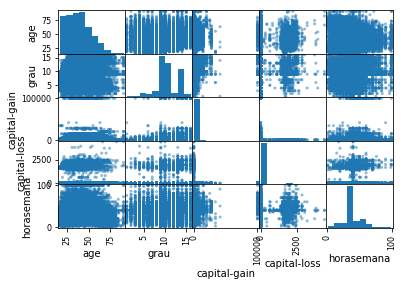

In [273]:
# Scatter Plot 
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

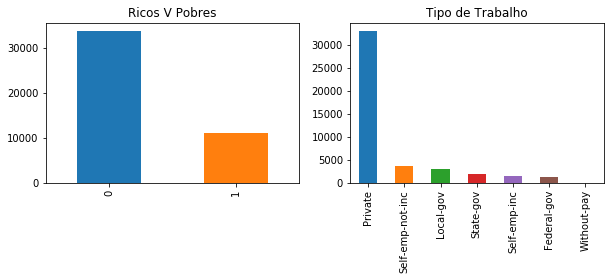

In [321]:
import pylab as plt

# define tamanho padrão das figuras
plt.rc('figure', figsize=(10, 5))
fizsize_with_subplots = (10, 10)
bin_size = 10 

%matplotlib inline

fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Ricos X Pobres
plt.subplot2grid(fig_dims, (0, 0))
df['class'].value_counts().plot(kind='bar', title='Ricos V Pobres')

# Tipo de Trabalho
plt.subplot2grid(fig_dims, (0, 1))
df['workclass'].value_counts().plot(kind='bar', title='Tipo de Trabalho')


Text(0.5,1,'Idade')

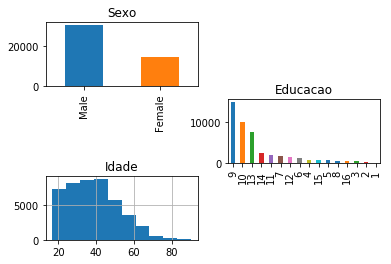

In [322]:
# Gênero
plt.subplot2grid(fig_dims, (0, 0))
df['sexo'].value_counts().plot(kind='bar', title='Sexo')

# Educacao
plt.subplot2grid(fig_dims, (1, 1))
df['grau'].value_counts().plot(kind='bar', title='Educacao')

# Idade
plt.subplot2grid(fig_dims, (2, 0))
df['age'].hist()
plt.title('Idade')

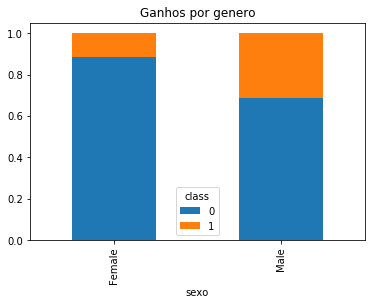

In [323]:
# Vamos verificar o ganho por genero
# Cria uma tabela utilizando a função crosstad do pandas
sex_val_ct = pd.crosstab(df['sexo'], df['class'])
# Normaliza a tabela para a soma dar 1
sex_val_ct_pct = sex_val_ct.div(sex_val_ct.sum(1).astype(float), axis=0)
# Exibe o gráfico
sex_val_ct_pct.plot(kind='bar', stacked=True, title='Ganhos por genero')

### Visualização com Seaborn (pacote menos complexo, mas gráficos menos flexíveis)

In [315]:
# Importa o pacote
import seaborn as sns

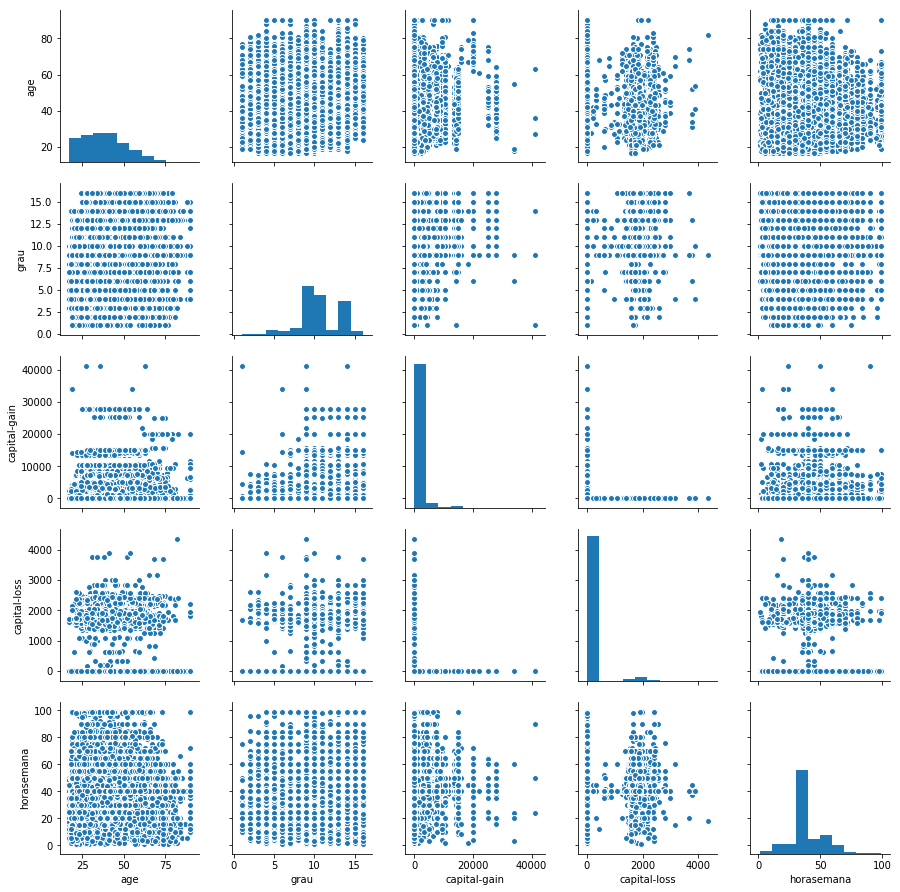

In [316]:
# Scatter Plot (pairplot)
sns.pairplot(df)

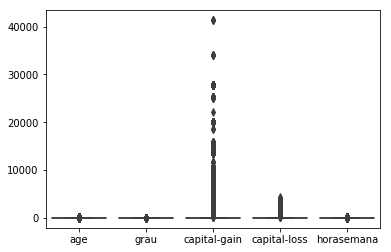

In [314]:
# Boxplot com orientação vertical
sns.boxplot(data = df, orient = "v")

In [313]:
# Aparentemente o capital gain possui outliers. Vamos verificar:
print('Capital gain mínima:',  df['capital-gain'].min())
print('Capital gain média:',  df['capital-gain'].mean())
print('Capital gain máxima:',  df['capital-gain'].max())

Capital gain mínima: 0
Capital gain média: 601.0130210066325
Capital gain máxima: 41310


In [312]:
df = df.replace({"capital-gain": {99999: 1101}})

In [326]:
# Salvando um dataframe para a proxima fase
df.to_csv('data/salario_f2.csv')